# KRAS proteomics cis comparison

## Step 1: Library Imports

Run this cell to import the necessary libraries

In [9]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import scipy.stats
import sys 
sys.path.append('C:\\Users\\brittany henderson\\GitHub\\WhenMutationsMatter\\Brittany\\')
import functions as f

import cptac
import cptac.algorithms as al

## Step 2: Find the frequently mutated genes for Endometrial Cancer

Enter the type of cancer and the cutoff for mutation frequency that you would like to use.

In [10]:
en_object = cptac.Endometrial()
desired_cutoff = .1

endometrial_freq_mut = al.get_frequently_mutated(en_object, cutoff=desired_cutoff)
print('\n\nNumber of Frequently Mutated Genes:', len(endometrial_freq_mut), '\n', endometrial_freq_mut.head())

                                    

Number of Frequently Mutated Genes: 232 
         Unique_Samples_Mut  Missence_Mut  Truncation_Mut
Gene                                                    
ABCA12            0.147368      0.094737        0.073684
ABCA13            0.115789      0.105263        0.042105
ACVR2A            0.105263      0.010526        0.094737
ADGRG4            0.136842      0.126316        0.021053
ADGRV1            0.115789      0.094737        0.052632


## Step 3: Select a gene from the list of frequently mutated genes above

Set the gene to which of the above frequently mutated genes you want to examine. For example, if you want to look at the gene PTEN, change the cell below to say "gene = 'KRAS'"

In [11]:
gene = 'KRAS'

## Step 4: Select desired omics comparison

Select which type of omics you want to compare. If you want to compare proteomics data for the interacting proteins, uncomment the "omics = en.get_proteomics()" line, etc.

In [12]:
omics = en_object.get_proteomics()
#omics = en_object.get_transcriptomics()
#omics = en_object.get_phosphoproteomics()
#omics = en_object.get_acetylproteomics()

## Step 5: cis comparison 

Determine if the DNA mutation has an effect on the omics measurement. In order to do this, we have a few steps in code. These steps are found in the format_cis_comparison_data function.
1. get a table with both the omics and mutation data for tumors
2. get a binary column from the mutation data to separate our samples
3. format data frame to be used in the T-test
4. send data to the T-test.

The format_cis_comparison_data function returns a dictionary with the data, x, and y names needed to plot the comparison.

In [14]:
data_for_comparison = f.format_cis_comparison_data(en_object, omics, 'proteomics', gene)
data_for_comparison
'''
# Make a list of the column label of omics to be used in the wrap_ttest function
omics_col_list = [omics_binary_mutations.columns[0]] 

# Step 4 - T-test comparing means of mutated vs wildtype effect on cis omics
print("Doing t-test comparison\n")
significant_pval_results = al.wrap_ttest(omics_binary_mutations, 'binary_mutations', omics_col_list)
print(significant_pval_results)'''

TypeError: format_cis_comparison_data() takes 3 positional arguments but 4 were given

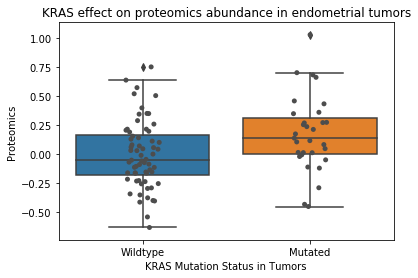

In [8]:
# Step 5 - Create boxplt to compare wildtype and mutated effect on omics data
en_cis_boxplot = sns.boxplot(data = data_for_comparison['data'], x = data_for_comparison['x'],
                          y =data_for_comparison['y'], order = ["Wildtype","Mutated"])  
en_cis_boxplot.set_title(gene + " effect on " + omics.name + " abundance in endometrial tumors")
en_cis_boxplot = sns.stripplot(data= data_for_comparison['data'], x = data_for_comparison['x'],
                            y = data_for_comparison['y'],jitter = True, color = ".3", order = ["Wildtype","Mutated"])
en_cis_boxplot.set(xlabel = gene + " Mutation Status in Tumors", ylabel = "Proteomics")
plt.show()

In [9]:
mutation_type_comparison = get_missence_truncation_comparison(en_object, omics, gene)
mutation_type_comparison

# Make a list of the column label of omics to be used in the wrap_ttest function
omics_col_list = [binary_mut_omics.columns[0]] 

# Step 4 - T-test comparing means of mutated vs wildtype effect on cis omics
print("Doing t-test comparison\n")
significant_pval_results = al.wrap_ttest(binary_mut_omics, 'binary_mutations', omics_col_list)
print(significant_pval_results)

Only missence type mutations found for KRAS. Not possible to compare mutation types.


# Repeat with the Colon dataset

Go through the same process, this time using the Colon dataset. We will only print five genes from the frequently mutated data frame for simplicity.

In [10]:
colon_object = cptac.Colon()
desired_cutoff = .1

colon_freq_mut = al.get_frequently_mutated(colon_object, cutoff=desired_cutoff)
print('\n\nNumber of Frequently Mutated Genes:', len(colon_freq_mut), '\n', colon_freq_mut.head())

matting dataframes...data.....ata....

Number of Frequently Mutated Genes: 612 
      Gene  Unique_Samples_Mut  Missence_Mut  Truncation_Mut
0  ABCA13            0.195876      0.164948        0.103093
1   ABCA2            0.175258      0.164948        0.030928
2   ABCA4            0.144330      0.082474        0.061856
3   ABCB4            0.134021      0.061856        0.072165
4   ABCB6            0.103093      0.061856        0.041237


In [11]:
gene = 'KRAS'

co_omics = colon_object.get_proteomics()
#co_omics = colon_object.get_transcriptomics()
#co_omics = colon_object.get_phosphoproteomics()
#co_omics = colon_object.get_acetylproteomics()

In [12]:
co_data_for_comparison = format_cis_comparison_data(colon_object, co_omics, gene)


Doing t-test comparison

        Comparison   P_Value
0  KRAS_proteomics  0.039128


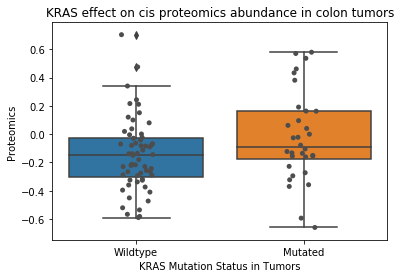

In [13]:
cis_boxplot = sns.boxplot(data = co_data_for_comparison['data'], x = co_data_for_comparison['x'],
                          y = co_data_for_comparison['y'], order = ["Wildtype","Mutated"])  
cis_boxplot.set_title(gene + " effect on cis " + omics.name + " abundance in colon tumors")
cis_boxplot = sns.stripplot(data = co_data_for_comparison['data'], x = co_data_for_comparison['x'],
                            y = co_data_for_comparison['y'], jitter = True, color = ".3", 
                            order = ["Wildtype","Mutated"])
cis_boxplot.set(xlabel = gene + " Mutation Status in Tumors", ylabel = "Proteomics")
plt.show()

# Repeat with the Ovarian dataset


In [14]:
ovarian_object = cptac.Ovarian()
desired_cutoff = .1

ovarian_freq_mut = al.get_frequently_mutated(ovarian_object, cutoff=desired_cutoff)

In [15]:
gene = 'KRAS'

ov_omics = ovarian_object.get_proteomics()
#ov_omics = ovarian_object.get_transcriptomics()
#ov_omics = ovarian_object.get_phosphoproteomics()
#ov_omics = ovarian_object.get_acetylproteomics()
ovarian_freq_mut

,Gene,Unique_Samples_Mut,Missence_Mut,Truncation_Mut
0,BIRC6,0.120482,0.108434,0.024096
1,FSIP2,0.108434,0.096386,0.024096
2,MT-CO1,0.120482,0.120482,0.000000
3,MT-CO3,0.120482,0.108434,0.012048
4,MT-ND5,0.108434,0.084337,0.024096
5,MUC12,0.144578,0.144578,0.012048
6,MUC16,0.144578,0.144578,0.012048
7,MUC17,0.144578,0.144578,0.000000
8,MUC4,0.325301,0.313253,0.012048
9,MUC5B,0.108434,0.108434,0.000000


In [16]:
ov_data_for_comparison = format_cis_comparison_data(ovarian_object, ov_omics, gene)

exeption with columns. check omics data


In [17]:
# Step 5 - Visualize comparison
ov_cis_boxplot = sns.boxplot(data = ov_data_for_comparison['data'], x = ov_data_for_comparison['x'],
                          y = ov_data_for_comparison['y'], order = ["Wildtype","Mutated"])  
ov_cis_boxplot.set_title(gene + " effect on " + omics.name + " abundance")
ov_cis_boxplot = sns.stripplot(
    data = ov_data_for_comparison['data'], x = ov_data_for_comparison['x'],y = ov_data_for_comparison['y'], 
    jitter = True, color = ".3", order = ["Wildtype","Mutated"])
ov_cis_boxplot.set(xlabel = gene + " Mutation Status in Tumors", ylabel = "Proteomics")
plt.show()

TypeError: 'NoneType' object is not subscriptable